In [1]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Import library
import re #regx library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypdf import PdfReader # Read pdf
import seaborn as sns


%matplotlib inline

In [ ]:
plt.style.use('seaborn-v0_8-dark')

In [4]:
df = pd.read_csv('./datasets/resume.csv')
df = pd.DataFrame(df)
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.columns

Index(['Category', 'Resume'], dtype='object')

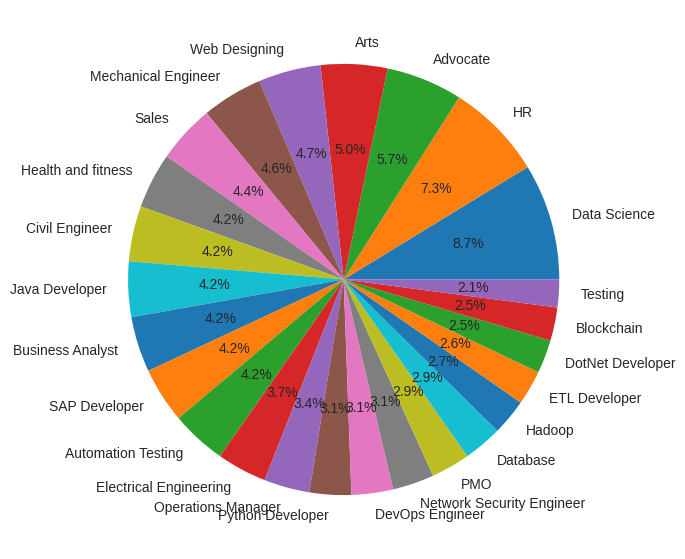

In [6]:
counts = df['Category'].value_counts()
label = df['Category'].unique()
plt.figure(figsize=(7,7))
plt.pie(counts,labels=label,autopct='%1.1f%%')
plt.show()

In [7]:
# Clean Job Description
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    cleanText = cleanText.lower()
    return cleanText

In [8]:
df['Resume'] = df['Resume'].apply(lambda x:cleanResume(x))

In [9]:
cleanResume('HEllo i am Ali Hassan')

'hello i am ali hassan'

In [10]:
df['Resume'] = df['Resume']

# **Model Training**
### RandomForestClassifier

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [49]:
lb = LabelEncoder()
tdif = TfidfVectorizer(stop_words='english')
category = lb.fit_transform(df['Category'])
classfier = RandomForestClassifier()

In [50]:
lb.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [51]:
tdif.fit(df['Resume'])
rqeuired = tdif.fit_transform(df['Resume'])

In [21]:
X = rqeuired
y = category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
classfier.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
pred = classfier.predict(X_test)

In [30]:
print(accuracy_score(y_test,pred))

0.9937106918238994


<Axes: >

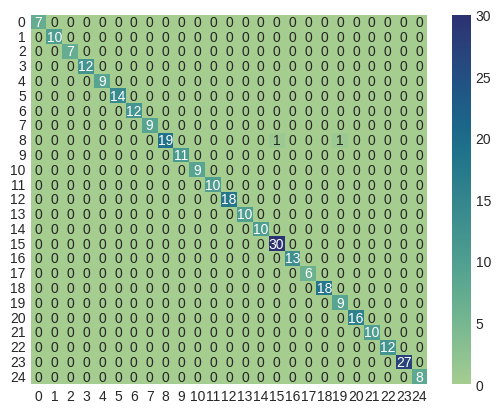

In [35]:
sns.set_style()
sns.heatmap(confusion_matrix(y_test,pred),annot=True, cmap="crest")

In [38]:
def pdf_read(url):
    reader = PdfReader(url)
    read = reader.pages[0]
    text = read.extract_text()
    return text

url = './resume.pdf'
resume = pdf_read(url)

In [52]:
import pickle
pickle.dump(tdif,open('tdif.pkl','wb'))
pickle.dump(classfier,open('classfier.pkl','wb'))

In [48]:
# Load the trained classifier
clf = pickle.load(open('./list/classfier.pkl', 'rb'))
tdiff = pickle.load(open('./list/tdif.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(resume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tdiff.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

NotFittedError: The TF-IDF vectorizer is not fitted